In [1]:
%matplotlib widget
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker, cm
from matplotlib.ticker import LogFormatter 
from Utils import *
from scipy.optimize import curve_fit
import copy
import os
import h5py
import json

import PyPDF2                       # Per unire i PDF alla fine
import glob                         # Per manipolazione dei path

from collections.abc import Iterable


In [2]:
config_file = r"./config.json"
print (config_file)

with open(config_file, "r") as f:
            dizi = json.load(f)
        
dizi
Swan = False

./config.json


[1184.316, 2458.465993411586, 3790.8359739489474, 5084.947, 6333.400494286586, 7615.780614123246, 15139.726070361163] [207.0, 265.78363774321593, 285.0594765218644, 220.0, 381.37335364177926, 403.58496854301774, 595.4196412409171]


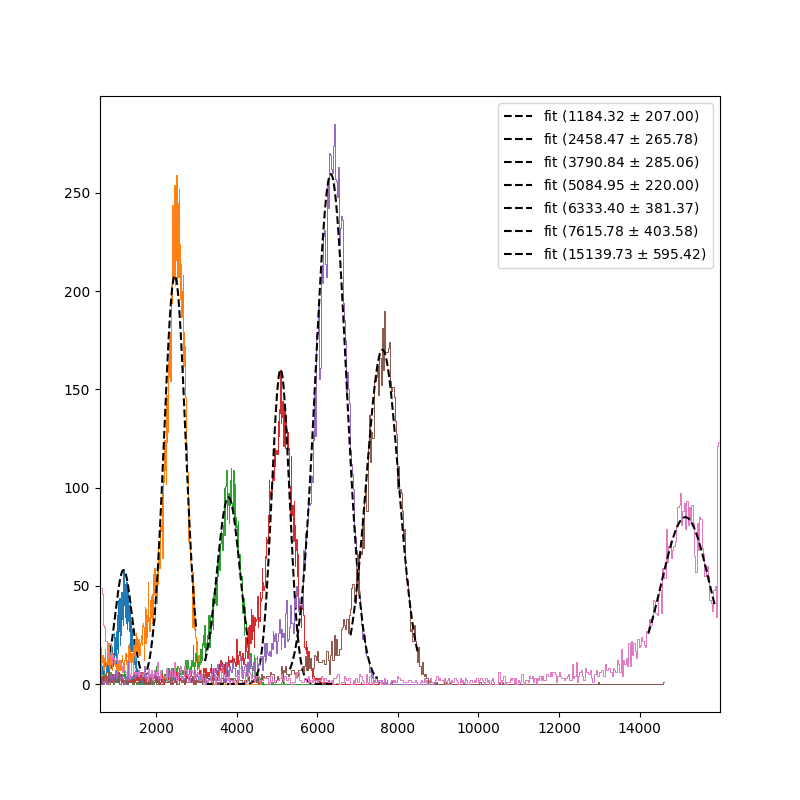

In [6]:
n_runs  = [680253,680254,680258,680259,680260,680261,680257]
# n_runs  = [680257]#,680257]
Beam_en = [1000,2000,3000,4000,5000,6000,12000]

# print(xpos.shape)

# fig, ax = plt.subplots(2)
# xpos,xinfo,ph,tm,evi,Beatles,x1,y1,x2,y2,x_cry,y_cry = file_corrector(n_runs)
# ax[0].hist(ph[:,0],500)
# ax[0].set_xlim(0,4000)

fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)
En_values=[]
sigma_values=[]
for i, run in enumerate(n_runs):
    # print(str(Beam_en[i])+' GeV')
    xpos,xinfo,ph,tm,evi,Beatles,x1,y1,x2,y2,x_cry,y_cry = file_corrector(run)

    # ax.hist(ph[:,1][ph[:,0]>300],500,label = str(Beam_en[i]) + 'GeV')
    # ax[1].hist(ph[:,1][ph[:,0]>300],500,label = str(Beam_en[i]))
    ax.set_xlim(600,15999)
    ax.grid()
    # ax[1].grid()

    fit_range_min = [800,1650,3200,3200,5300,6800,14200]
    fit_range_max = [1600,3000,4300,6500,7500,8500,15900]
    
    # h, bins = np.histogram(ph[:,1][mask_fit_range], 100)
    h, bins = np.histogram(ph[:,1], 500)#, label = (str(Beam_en[i])+' GeV'))

    # print (fit_range_min[i],fit_range_max[i])
    binc = bins[:-1] + (bins[1] - bins[0]) / 2
    fit_range = (binc >= fit_range_min[i]) & (binc <= fit_range_max[i])
  

    x_fit = binc[fit_range]
    y_fit = h[fit_range]
       
    #guesses
    p0 = (max(y_fit), x_fit[np.argmax(y_fit)], len(x_fit))
    # print(p0)
    
    fit_popt, pcov = curve_fit(myGauss, x_fit, y_fit, sigma = np.sqrt(y_fit), absolute_sigma = True, p0 = p0)
    En_values.append(fit_popt[1])
    sigma_values.append(fit_popt[2])
    ax.plot(binc, h, ds = "steps-mid", lw = .7)
    # ax.axvline(fit_range_max[i])
    # ax.axvline(fit_range_min[i])
    ax.plot(x_fit, myGauss(x_fit, *fit_popt), ls = "--", c = "k", label = f"fit ({fit_popt[1]:.2f} $\pm$ {fit_popt[2]:.2f}) ")
    ax.grid()
    ax.legend(fontsize = 10)
    
print(En_values,sigma_values)
plt.show()

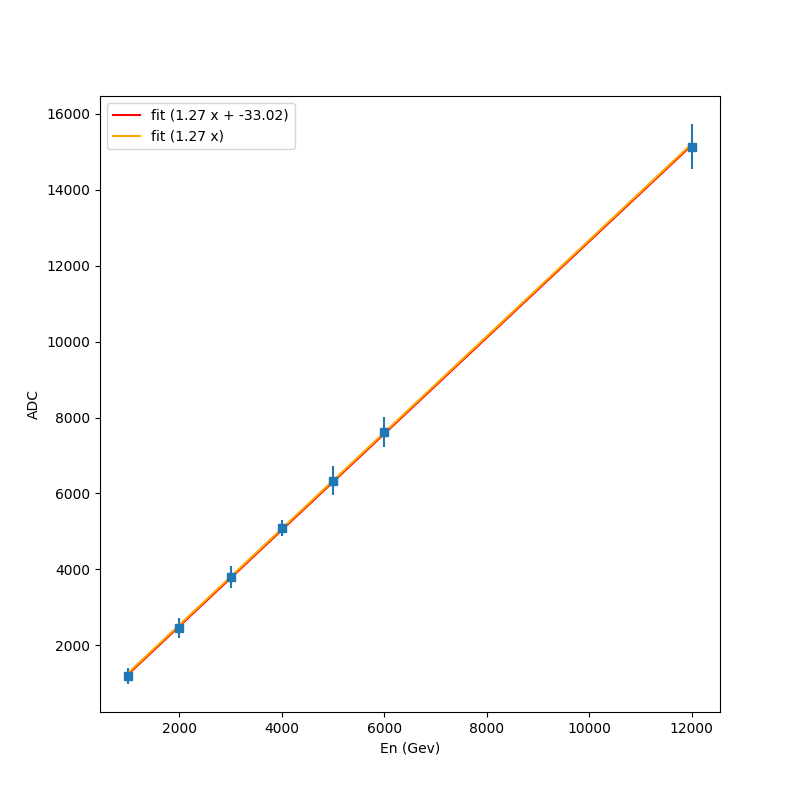

In [7]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)


ax.errorbar(Beam_en,En_values,sigma_values,marker='s',ls='')

slope, intercept = np.polyfit(Beam_en, En_values, 1)
fit_line = slope * np.array(Beam_en) + intercept
NewData={"slope_LG": slope, "intercept_LG": intercept}
dizi.update(NewData)
fit_minusq=slope * np.array(Beam_en)
# Plot the linear fit
ax.plot(Beam_en, fit_line, color='red', label=f"fit ({slope:.2f} x + {intercept:.2f})")
ax.plot(Beam_en, fit_minusq, color='orange', label=f"fit ({slope:.2f} x)")
ax.set_xlabel('En (Gev)')
ax.set_ylabel('ADC')
ax.legend()
plt.show()
##### upload new element to the json file 
with open(config_file, "w") as f:
            json.dump(dizi, f, indent=4)